#Tarea 3 -- formulario de carga de datos y respuestas

En este notebook pueden ingresar sus respuestas a las preguntas de tarea 3, y asegurarse que sus comandos SQL y de Pandas funcionan de manera adecuada.

### Cargar SQLite y subir la base de datos a Google Colab

Cómo siempre, para poder ocupar el notebook, lo deben subir a https://colab.research.google.com

Luego, ejecutando el siguiente campo, se crea una instancia de servidor SQLite, se creará el esquema vista en el enunciado, y se cargarán los datos desde un google drive. Adicionalmente, se descarga el archivo `country_profile_variables.csv` para ser ocupado con Pandas.

In [3]:
# Cargamos SQL y la base de datos:
%load_ext sql
!wget -O datos_T3.db --no-check-certificate https://drive.google.com/uc\?export\=download\&id\=14puII6h6V45QY_FwRsgY_g86y7hf9IcE

%sql sqlite:///datos_T3.db

# Descargaamos el csv:
!wget -O country_profile_variables.csv --no-check-certificate https://drive.google.com/uc\?export\=download\&id\=1-BgcUpF6qg6AaqclFE6OfmsHY5gdQZ2N

# Importamos Pandas:
import pandas as pd

--2023-04-27 22:21:22--  https://drive.google.com/uc?export=download&id=14puII6h6V45QY_FwRsgY_g86y7hf9IcE
Resolviendo drive.google.com (drive.google.com)... 64.233.186.138, 64.233.186.102, 64.233.186.101, ...
Conectando con drive.google.com (drive.google.com)[64.233.186.138]:443... conectado.
Petición HTTP enviada, esperando respuesta... 303 See Other
Localización: https://doc-08-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k3vrrrh5ubbgcvs5j75lhdaomkubs79o/1682648475000/10980901926740711681/*/14puII6h6V45QY_FwRsgY_g86y7hf9IcE?e=download&uuid=2bab7b7a-264e-48d4-9fc2-9abfe2fcb814 [siguiendo]
Aviso: no se admiten comodines en HTTP.
--2023-04-27 22:21:22--  https://doc-08-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k3vrrrh5ubbgcvs5j75lhdaomkubs79o/1682648475000/10980901926740711681/*/14puII6h6V45QY_FwRsgY_g86y7hf9IcE?e=download&uuid=2bab7b7a-264e-48d4-9fc2-9abfe2fcb814
Resolviendo doc-08-88-docs.googleusercontent.com (doc-08-

## Pregunta 1

Cargue el archivo .csv a un dataframe de Pandas, y en base de este dataframe, crea un dataframe (o arreglo de numpy) que consiste solo de países ubicadas en Centro América, o el Caribe. Para esto, el archivo .csv tiene una columna denominada “Region”, y los valores que buscamos aquí serán “CentralAmerica” (sin espacios), o “Caribbean” (qualquiera de los dos). Cómo referencia, debes recuperar 33 países distintos en estas dos regiones.

In [4]:
# Tu respuesta aquí:
df_1 = pd.read_csv('country_profile_variables.csv')
df_1 = df_1[(df_1["Region"] == 'CentralAmerica') | (df_1["Region"] == "Caribbean")]

print(f"Countries: {len(df_1.country.values)}")
df_1.head()

Countries: 33


,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
6,Anguilla,Caribbean,91,15,165.7,97.6,320,2.9,21879.6,2.3,...,76.0,52,61.1,0.1/9.8,0,136,94.6/...,97.9/...,-99,-99
7,Antigua and Barbuda,Caribbean,442,102,231.8,92.3,1356,4.1,14764.5,1.9,...,65.2,55,22.3,0.5/5.8,-99,84,97.9/97.9,91.4/91.4,0.12,-99
10,Aruba,Caribbean,180,105,584.8,90.4,2702,0.1,26005.4,0.5,...,88.7,32,2.3,0.9/8.4,1,120,98.1/98.1,97.7/97.7,-99,-99
14,Bahamas,Caribbean,13940,395,39.5,95.9,8854,-1.7,22817.2,1.6,...,78.0,86,51.4,2.4/6.3,0,90,98.4/98.4,92.0/92.0,-99,-99
17,Barbados,Caribbean,431,286,664.5,91.9,4385,0.9,15429.4,1.7,...,76.1,56,14.7,1.3/4.5,2,59,99.7/99.7,96.2/96.2,...,-99


# Pregunta 2

En esta pregunta debes conseguir la información de cual persona participa en cual taller, y en cual país se organiza este taller. Quiere decir, que, en base de nuestra base de datos, debes armar un cursor que ejecuta la consulta recuperando esta información (ver el código en la celda abajo). En particular, te pedimos armar una consulta SQL que recupera, desde nuestra base de datos, la información de:
-	Rut de persona
-	Id del taller
-	 país de taller
Para cada inscripción registrada.
Luego debes cargar esta tabla/resultado del cursor en un dataframe de Pandas, y renombrar las columnas para que se llamen “rut”, “idTaller”, y “Pais”.


In [5]:
# Tu respuesta aquí:

# Importemos sqlite3 y creamos un cursor
import sqlite3

conn = sqlite3.connect( 'datos_T3.db'  )
conn.text_factory = lambda x: str(x, 'utf-8' )
curr = conn.cursor( )

# Aquí viene tu consulta y el resultado se carga en un dataframe:
curr.execute('''
    SELECT Persona.rut AS rut, Participa.idTaller AS idTaller, Lugar.nombrePais AS Pais
    FROM Persona
    JOIN Participa ON Persona.rut = Participa.rut
    JOIN EstaEn ON Participa.idTaller = EstaEn.idTaller
    JOIN Lugar ON EstaEn.idLugar = Lugar.id
    ''')

data = curr.fetchall()
columns = ["rut", "idTaller", "Pais"]

df_2 = pd.DataFrame(data, columns=columns)
df_2.head(20)



,rut,idTaller,Pais
0,227-40-2546,134,Russian Federation
1,716-91-2023,94,Slovenia
2,222-10-5678,138,Cambodia
3,097-65-5254,191,Svalbard & Jan Mayen Islands
4,509-82-0904,133,Kenya
5,592-98-6474,89,Turkey
6,106-26-6898,130,Puerto Rico
7,069-79-3655,170,Guadeloupe
8,197-77-2759,140,Slovenia
9,811-50-8892,141,Palestinian Territory


# Pregunta 3

En esta pregunta debes conseguir número de inscripciones a talleres en cada país recuperado en Pregunta 1. Quiere decir, para cada país de Centro América y del Caribe, debes calcular cuantas inscripciones hay en talleres que se organizan en este país. Nótense que aquí si una misma persona está inscrita en dos talleres distintos, esto cuenta cómo dos inscripciones (estamos calculando la participación, y no analizando el número de personas distintas que se inscriben). Si en un país no se organiza ningún taller, este no debe aparecer en tu resultado.
Para esto debes ocupar el dataframe de la Pregunta 1, junto con el dataframe de la Pregunta 2, y hacerles un merge (mismo cómo join en SQL). Después, ocupando la agregación de Pandas, debes contar cuantas inscripciones hay en talleres de cada país de Centro América y Caribe. 


In [6]:
# Tu respuesta aquí:
df_3 = df_1.merge(df_2, how='inner', left_on='country', right_on='Pais')

# Eliminamos nulos en idTaller (no deberia borrarse data ya que en los dataset 
# anteriores el inner join no da espacio a nulos)
df_3.dropna(subset=['idTaller'])

grouped_df_3 = df_3['Pais'].groupby(df_3['Pais']).count()
grouped_df_3

Pais
Aruba                               16
British Virgin Islands              13
Cuba                                 2
Dominican Republic                   1
Guadeloupe                           5
Honduras                             3
Martinique                           5
Puerto Rico                         21
Saint Vincent and the Grenadines     7
Turks and Caicos Islands            14
Name: Pais, dtype: int64

# Pregunta 4

En esta pregunta te pedimos armar un gráfico de barras (bar chart, ver nuestro Tutorial 12) de los datos obtenidos en la Pregunta 3. Quiere decir, tu gráfico debe tener en un eje el nombre del país, y en el otro, el número de inscripciones a talleres ene este país. De nuevo, esto es solo para los países de Centro América y del Caribe, y no es necesario graficar los países dónde no se organiza ningún taller. 

10


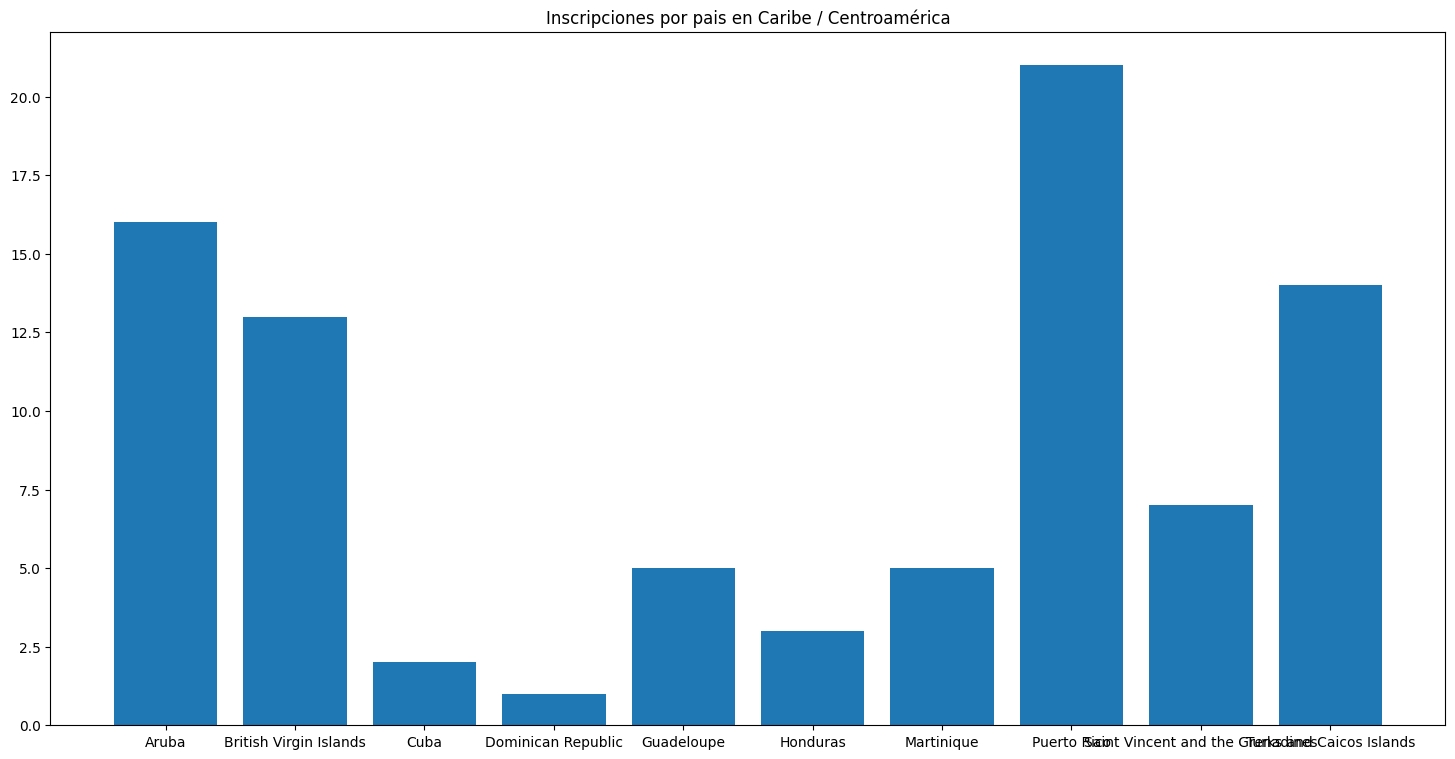

In [7]:
# Tu respuesta aquí:

# Importemos mathplotlib primero
import matplotlib as mpl
import matplotlib.pyplot as plt

# Al generar una figura se le puede modificar su tamaño con el parametro figsize
fig = plt.figure(figsize=(18,9))

title = "Inscripciones por pais en Caribe / Centroamérica"
plt.title(title)

print(len(grouped_df_3.keys()))
plt.bar(grouped_df_3.keys(), grouped_df_3)

plt.show()


# Pregunta 5

Ahora queremos ver si hay alguna conexión entre indicadores de un país con la cantidad de inscripciones a talleres que se organizan en este país. Para esto, debes conseguir, desde nuestro archivo .csv, o uno de los dataframes que armaste antes, la población del país (en el archivo .csv esta columna se llama “Population in thousands (2017)”), y ver, para cada país de Centro América y del Caribe, si la población más grande significa más inscripciones. ¿Qué puedes concluir aquí? ¿Hay alguna conexión? Con tu respuesta, también debes entregar el código qué genera esta información (de nuevo, para países de Centro América y Caribe dónde hay talleres).

In [30]:
# Tu respuesta aquí:
population_by_country = df_1[['country', 'Population in thousands (2017)']]
population_by_country.head(10)

,country,Population in thousands (2017)
6,Anguilla,15
7,Antigua and Barbuda,102
10,Aruba,105
14,Bahamas,395
17,Barbados,286
20,Belize,375
25,"Bonaire, Sint Eustatius and Saba",25
29,British Virgin Islands,31
38,Cayman Islands,62
50,Costa Rica,4906


Calculamos un dataset que haga un join entre los países y sus inscripciones. En este caso calculamos dos dataset: uno contiene todos los países de centro américa y el caribe sin importar si existió participación en el taller. En otro dataset, solo consideraremos países de centro américa y caribe que tengan al menos una participación. Lo anterior se logra utilizando un **left join** e **inner join**, respectivamente, entre la tabla de países / población y la tabla de participacion. Al utilizar el **inner join**, no se consideran las filas que contengan nulos.

In [42]:
# En este dataframe hacemos un left join, por lo que se consideraran paises que tienen talleres
# pero que podrían no tener inscripciones
df_5_left = population_by_country.merge(
      grouped_df_3.to_frame("participacion"),
      how="left",
      left_on="country",
      right_on="Pais")

# Transformamos las columnas con valores nulos a 0
df_5_left["participacion"] = df_5_left["participacion"].fillna(0)

# Aca se consideran solo los países que tengan al menos una inscripción
df_5_inner = population_by_country.merge(
      grouped_df_3.to_frame("participacion"),
      how="inner",
      left_on="country",
      right_on="Pais")

In [43]:
df_5_left.head(10)

,country,Population in thousands (2017),participacion
0,Anguilla,15,0.0
1,Antigua and Barbuda,102,0.0
2,Aruba,105,16.0
3,Bahamas,395,0.0
4,Barbados,286,0.0
5,Belize,375,0.0
6,"Bonaire, Sint Eustatius and Saba",25,0.0
7,British Virgin Islands,31,13.0
8,Cayman Islands,62,0.0
9,Costa Rica,4906,0.0


In [44]:
df_5_inner.head(10)

,country,Population in thousands (2017),participacion
0,Aruba,105,16
1,British Virgin Islands,31,13
2,Cuba,11485,2
3,Dominican Republic,10767,1
4,Guadeloupe,450,5
5,Honduras,9265,3
6,Martinique,385,5
7,Puerto Rico,3663,21
8,Saint Vincent and the Grenadines,110,7
9,Turks and Caicos Islands,35,14


Graficamos población vs participación de ambos dataframes

<Axes: title={'center': 'Participación > 0'}, xlabel='Population in thousands (2017)', ylabel='participacion'>

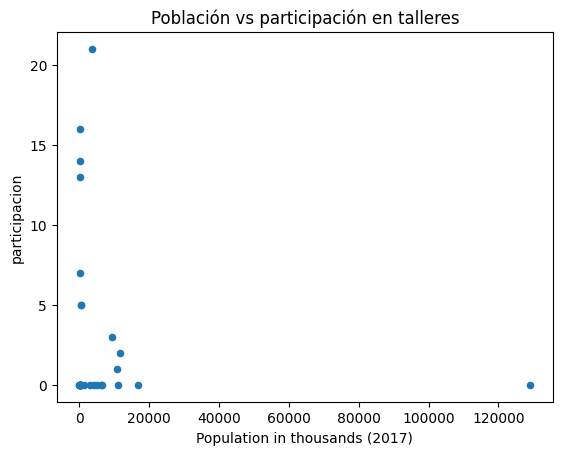

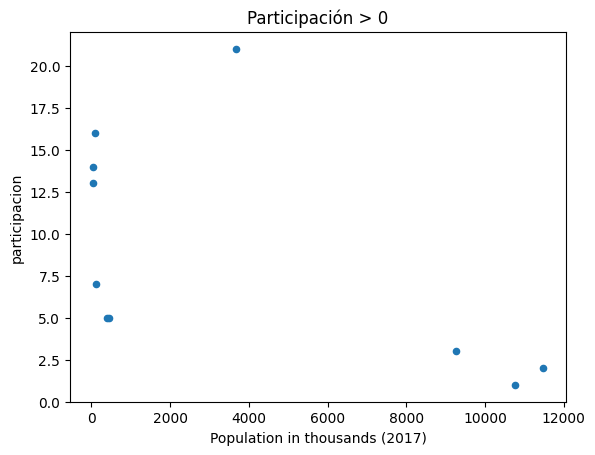

In [45]:
# Utilizamos las columnas de poblacion y participacion
df_5_left_cols = df_5_left[['Population in thousands (2017)', 'participacion']]
df_5_inner_cols = df_5_inner[['Population in thousands (2017)', 'participacion']]

# Graficamos las columnas de poblacion y participacion para todos los países
df_5_left_cols.plot.scatter(x='Population in thousands (2017)', y='participacion', title="Población vs participación en talleres")

# Graficamos solo países con participación mayor o igual a 1
df_5_inner_cols.plot.scatter(x='Population in thousands (2017)', y='participacion', title="Participación > 0")

De aquí en adelante solo utilizaremos el / los dataframe(s) que tengan países con al menos una participación.

Vemos los datos ordenados por población.

In [46]:
df_5_inner.head(50).sort_values(by="Population in thousands (2017)", ascending=False)

,country,Population in thousands (2017),participacion
2,Cuba,11485,2
3,Dominican Republic,10767,1
5,Honduras,9265,3
7,Puerto Rico,3663,21
4,Guadeloupe,450,5
6,Martinique,385,5
8,Saint Vincent and the Grenadines,110,7
0,Aruba,105,16
9,Turks and Caicos Islands,35,14
1,British Virgin Islands,31,13


Podemos ver, tanto en los gráficos como en el dataframe anterior, que la participación en talleres no guarda una relación directamente proporcional con la población total del país. Incluso, viendo el segundo gráfico cuyos países son aquellos que tienen al menos 1 participación, se puede ver una leve tendencia de que los países con menor población tienden a realizar más talleres que aquellos con mayor población. Si calculamos la correlación entre ambas variables obtenemos lo siguiente:

In [49]:
df_5_inner.corr(numeric_only=True)

,Population in thousands (2017),participacion
Population in thousands (2017),1.000000,-0.565393
participacion,-0.565393,1.000000


Así como comentábamos anteriormente, no se ve una relación directa entre la participación y población de estos países, y de hecho la leve tendencia de una relación inversa entre la población y participación es confirmada por una correlación negativa entre ambas variables, pero muy cercana a 0, debido a que en realidad ambas features no tienen mucha influencia entre sí.

Se podría interpretar que un país con menor población tiende a tener habitantes con una mayor disposición a inscribirse a talleres, debido a que es una buena oportunidad de aprender ciertas actividades para personas con menos recursos. Esto, asumiendo que los países con menor cantidad de habitantes podrían asociarse a países con una economía más débil, por lo que las tasas de natalidad y de emigración influyen en que disminuya su población.

# Pregunta 6

Aquí debes hacer el mismo ejercicio de la Pregunta 5, pero ahora ver si hay alguna conexión entre el ÏB del áís y el número de inscripciones. Para esto te sirve la columna “GDP per capita (current US$)” del archivo .csv. ¿Qué puedes concluir aquí? ¿Hay alguna conexión? Con tu respuesta, también debes entregar el código qué genera esta información (de nuevo, para países de Centro América y Caribe dónde hay talleres).

In [52]:
# Tu respuesta aquí:
pib_by_country = df_1[['country', 'GDP per capita (current US$)']]
pib_by_country.head(10)

,country,GDP per capita (current US$)
6,Anguilla,21879.6
7,Antigua and Barbuda,14764.5
10,Aruba,26005.4
14,Bahamas,22817.2
17,Barbados,15429.4
20,Belize,4789.4
25,"Bonaire, Sint Eustatius and Saba",-99.0
29,British Virgin Islands,30144.5
38,Cayman Islands,62132.0
50,Costa Rica,11015.0


Hacemos un **inner join** entre la tabla de pib y participación, excluyendo así a aquellos países que tengan no tengan inscripciones en talleres

In [56]:
df_6_inner = pib_by_country.merge(
      grouped_df_3.to_frame("participacion"),
      how="inner",
      left_on="country",
      right_on="Pais")

df_6_inner.head(10)

,country,GDP per capita (current US$),participacion
0,Aruba,26005.4,16
1,British Virgin Islands,30144.5,13
2,Cuba,7656.6,2
3,Dominican Republic,6373.6,1
4,Guadeloupe,-99.0,5
5,Honduras,2521.9,3
6,Martinique,-99.0,5
7,Puerto Rico,27939.0,21
8,Saint Vincent and the Grenadines,6739.2,7
9,Turks and Caicos Islands,25121.8,14


Graficamos PIB vs participación

<Axes: title={'center': 'PIB vs participación en talleres'}, xlabel='GDP per capita (current US$)', ylabel='participacion'>

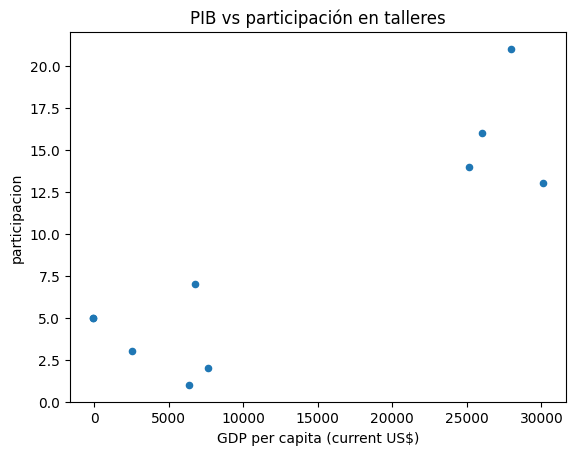

In [57]:
# Utilizamos las columnas de poblacion y participacion
df_6_cols = df_6_inner[['GDP per capita (current US$)', 'participacion']]

# Graficamos las columnas de poblacion y participacion
df_6_cols.plot.scatter(x='GDP per capita (current US$)', y='participacion', title="PIB vs participación en talleres")

Para desplegar más información, podemos ver los datos ordenados por PIB y su participación.

In [62]:
df_6_inner.head(10).sort_values(by="GDP per capita (current US$)", ascending=False)

,country,GDP per capita (current US$),participacion
1,British Virgin Islands,30144.5,13
7,Puerto Rico,27939.0,21
0,Aruba,26005.4,16
9,Turks and Caicos Islands,25121.8,14
2,Cuba,7656.6,2
8,Saint Vincent and the Grenadines,6739.2,7
3,Dominican Republic,6373.6,1
5,Honduras,2521.9,3
4,Guadeloupe,-99.0,5
6,Martinique,-99.0,5


A priori, podemos ver una tendencia de que a mayor PIB existe mayor participación en talleres, contrario a la cantidad de población vs participación en talleres según vimos anteriormente. Podemos calcular una correlación entre ambas variables, la cual debería ser positiva.

In [63]:
df_6_inner.corr(numeric_only=True)

,GDP per capita (current US$),participacion
GDP per capita (current US$),1.000000,0.877607
participacion,0.877607,1.000000


Vemos una correlación positiva y cercana a 1. Tal dato nos indica que existe una posible dependencia entre el PIB y la participación en talleres, sin embargo no implica aún una relación de causalidad. En este caso, una interpretación posible es que dichos talleres podrían tener un cierto costo asociado y por lo tanto una buena situación económica del país podría contribuir a que exista mayor posibilidades para financiar dichos talleres. Este pequeño análisis no es muy coherente con el de la pregunta anterior, pero debemos considerar que al momento de analizar la participación en talleres versus población, la correlación era más cercana a 0. Dicha situación nos obliga a mirar más variables en los datos con los que contamos para poder explicar con mas certeza los factores que influyen en la participación en talleres, para cada país.

Creamos una tabla que contenga PIB, población y participación y analizamos su correlación.

In [65]:
pib_population = df_1[['country', 'GDP per capita (current US$)', 'Population in thousands (2017)']]

participacion_pib_population = pib_population.merge(
      grouped_df_3.to_frame("participacion"),
      how="inner",
      left_on="country",
      right_on="Pais")

participacion_pib_population.head(10)

,country,GDP per capita (current US$),Population in thousands (2017),participacion
0,Aruba,26005.4,105,16
1,British Virgin Islands,30144.5,31,13
2,Cuba,7656.6,11485,2
3,Dominican Republic,6373.6,10767,1
4,Guadeloupe,-99.0,450,5
5,Honduras,2521.9,9265,3
6,Martinique,-99.0,385,5
7,Puerto Rico,27939.0,3663,21
8,Saint Vincent and the Grenadines,6739.2,110,7
9,Turks and Caicos Islands,25121.8,35,14


Ordenamos por PIB

In [66]:
participacion_pib_population.head(10).sort_values(by="GDP per capita (current US$)", ascending=False)

,country,GDP per capita (current US$),Population in thousands (2017),participacion
1,British Virgin Islands,30144.5,31,13
7,Puerto Rico,27939.0,3663,21
0,Aruba,26005.4,105,16
9,Turks and Caicos Islands,25121.8,35,14
2,Cuba,7656.6,11485,2
8,Saint Vincent and the Grenadines,6739.2,110,7
3,Dominican Republic,6373.6,10767,1
5,Honduras,2521.9,9265,3
4,Guadeloupe,-99.0,450,5
6,Martinique,-99.0,385,5


Ordenamos por población

In [67]:
participacion_pib_population.head(50).sort_values(by="Population in thousands (2017)", ascending=False)

,country,GDP per capita (current US$),Population in thousands (2017),participacion
2,Cuba,7656.6,11485,2
3,Dominican Republic,6373.6,10767,1
5,Honduras,2521.9,9265,3
7,Puerto Rico,27939.0,3663,21
4,Guadeloupe,-99.0,450,5
6,Martinique,-99.0,385,5
8,Saint Vincent and the Grenadines,6739.2,110,7
0,Aruba,26005.4,105,16
9,Turks and Caicos Islands,25121.8,35,14
1,British Virgin Islands,30144.5,31,13


A priori, vemos que a mayor PIB, mayor participación. A su vez, a mayor población, menor participación. Calculamos la correlación entre estas tres variables.

In [68]:
participacion_pib_population.corr(numeric_only=True)

,GDP per capita (current US$),Population in thousands (2017),participacion
GDP per capita (current US$),1.000000,-0.351060,0.877607
Population in thousands (2017),-0.351060,1.000000,-0.565393
participacion,0.877607,-0.565393,1.000000


Ahora tenemos otro dato adicional, la correlación entre población y PIB per cápita es negativa y de -0.35. Es decir, en realidad no se ve mucha dependencia de una variable versus otra, pero aún así existe una tendencia de que a mayor población, menor PIB per cápita, lo que se puede explicar por el total de riquezas de un país, dividido por el total de sus habitantes disminuye a medida de que aumentan los habitantes.